# League of Legends
League of Legends è un videogioco Multiplayer Online Battle Arena (MOBA). Dieci giocatori divisi in due squadre combattono tra di loro per distruggere la base nemica.
Per gli scopi di questo progetto il riassunto non sarà esaustivo e eviterà di menzionare aspetti del gioco non inerenti al nostro studio.

La mappa su cui si svolge il gioco è la seguente

<img src="assets/league_of_legends_map.jpg" width=600/>

# In foto sono evidenziati:
## Nexus
Il Nexus è il cuore della base di una squadra, in foto è la gemma che si trova in basso a sinistra e in alto a destra per la squadra blu e rossa, rispettivamente. Il Nexus è protetto da tre inhibitor.

## Inhibitor
L'inhibitor è una struttura il cui scopo è proteggere il nexus. Una volta distrutto anche un solo inhibitor il Nexus viene scoperto e diventa vulnerabile ad attacchi nemici. Gli inhibitor sono protetti dalle torri presenti nelle lane.

## Lane
Ci sono tre corsie (lane) che partono dalla base blu e arrivano alla rossa, una in cima, in mezzo e in basso. Le corsie sono spesso occupate da giocatori che la difendono, in quanto per corsia sono presenti 2 torri per ciascuna squadra che proteggono gli Inhibitor. Una volta distrutte le due torri appartenenti ad una squadra in una lane, diventa vulnerabile l'inhibitor.

## Torre
La torre (in foto sono le statue sulle lane) è una struttura il cui scopo è proteggere la lane, per avanzare una squadra deve distruggere le torri presenti sulla lane per avanzare all'inhibitor

## Giungla
Tutto il territorio presente in mezzo alle lane, contiene mostri e obbiettivi. Gli obbiettivi appaiono a periodi prefissati nella partita, i principali sono

### Drake
Un drago appare periodicamente in basso a destra nella giungla, la squadra che lo sconfigge ottiene dei bonus

### Rift Herald
Un Rift Herald appare periodicamente verso inizio partita in alto a sinistra sulla mappa, la squadra che lo sconfigge può evocarlo per distruggere le torri nemiche

### Baron
Il Baron appare periodicamente verso fine partita, la squadra che lo sconfigge ottiene dei bonus temporanei

## Sintesi
Una squadra per vincere deve penetrare le difese di almeno una lane (torri), distruggere l'inhibitor ad esso associata e finire distruggendo il Nexus. 

## Scopo del progetto
Lo scopo del progetto è quello di studiare e trovare correlazioni e probabilità associate ai vari aspetti di una partita di League of Legends.

In [17]:
# Importazione dataset

import os
import numpy as np
from urllib.request import urlretrieve
from zipfile import ZipFile

# constants
URL = "https://www.kaggle.com/api/v1/datasets/download/datasnaek/league-of-legends"
DATA_DIR = "data/"
ZIP_NAME = "compressed.zip"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

os.chdir(os.path.join(os.getcwd(), DATA_DIR))

if not os.path.exists(ZIP_NAME):
    # scarica il file dall'URL indicato
    urlretrieve(URL, ZIP_NAME)
    # apri il file zip ed estrai tutto il contenuto nella directory corrente
    with ZipFile(ZIP_NAME) as f:
        f.extractall()

In [18]:
# Parsing dati

import pandas as pd
import json

games_data = pd.read_csv('games.csv', index_col=['gameId'])

# Carica il file
with open("champion_info.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Accedi alla parte utile dei dati (data["data"] è un dizionario con campioni)
champion_data = data["data"]

# Trasforma il dizionario in DataFrame
df_champions_keyID = pd.DataFrame.from_dict(champion_data, orient="index")
# Carica il file
with open("champion_info_2.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Accedi alla parte utile dei dati (data["data"] è un dizionario con campioni)
champion_data = data["data"]

# Trasforma il dizionario in DataFrame
df_champions_nameID = pd.DataFrame.from_dict(champion_data, orient="index")

In [19]:
# L'anima del drago è un bonus che riceve una squadra se ha ucciso almeno quattro draghi.
games_data["t1_hasDragonSoul"] = games_data["t1_dragonKills"] >= 4
games_data["t2_hasDragonSoul"] = games_data["t2_dragonKills"] >= 4

# Probabilità di vittoria condizionata
Il gioco contiene molte variabili e offre innumerevoli opzioni a ciascun giocatore, questa analisi servirà a quantificare l'impatto che hanno l'acquisizione degli obiettivi principali non solo sulla vittoria di una squadra, ma anche sull'acquisizione di altri obbiettivi (effetto palla di neve).

In [20]:
# Calcola vittoria condizionata alla colonna on_column
def win_conditional_prob(data: pd.DataFrame, on_column: str):
    intersect_count = len(data[(data["winner"] == 1) & (data[on_column] == 1)])
    on_column_count = len(data[data[on_column] == 1])
    
    return intersect_count / on_column_count

In seguito calcoliamo una matrice di correlazione sulle seguenti colonne:
- Winner

    Quale squadra ha vinto

- First Blood

    Quale squadra ha ottenuto il primo sangue
    
- First Tower

    Quale squadra ha distrutto la prima torre

- First Inhibitor

    Quale squadra ha distrutto il primo inhibitor
    
- First Baron

    Quale squadra ha sconfitto il primo baron
    
- First Dragon

    Quale squadra ha sconfitto il primo drago (drake)
    
- First Rift Herald

    Quale squadra ha acquisito il primo Rift Herald

- T1/T2 Has Dragon Soul

    Se la squadra 1/2 ha ottenuto l'anima del drago
    
Possiamo fare varie osservazioni sui risultati:
1. Tutte le colonne inerenti ad un obiettivo ottenuto dalla squadra sono positivamente correlate con la vittoria

    Non tutti gli obbiettivi sono uguali però: La correlazione maggiore la possiamo osservare tra primo inhibitor e vittoria (0.72), mentre la correlazione tra vittoria e First Blood è nettamente inferiore (0.18). In seguito approfondiremo 


In [21]:
import numpy as np
import matplotlib.pyplot as plt

corr_frame = games_data.copy()
columns = ['winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_hasDragonSoul', 't2_hasDragonSoul']

# Trasformo i dati in modo da renderli più adatti all'analisi
ternary_map = {
    0: 0,
    1: 1,
    2: -1,
}

for column in columns:
    model_data[column] = model_data[column].map(ternary_map)


for column in columns:
    corr_frame[column] = corr_frame[column] == 1
    

corr_frame[columns].corr().style.format('{:.2f}', na_rep="")\
    .bar(align=0, vmin=-1, vmax=1, cmap="RdYlGn", height=50, width=60)

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_hasDragonSoul,t2_hasDragonSoul
winner,1.00,0.18,0.41,0.72,0.39,0.34,0.22,0.14,-0.15
firstBlood,0.18,1.00,0.22,0.16,0.06,0.14,0.11,0.03,-0.02
firstTower,0.41,0.22,1.00,0.40,0.15,0.32,0.26,0.08,-0.08
firstInhibitor,0.72,0.16,0.40,1.00,0.42,0.32,0.24,0.16,-0.11
firstBaron,0.39,0.06,0.15,0.42,1.00,0.17,0.13,0.16,-0.02
firstDragon,0.34,0.14,0.32,0.32,0.17,1.00,0.19,0.21,-0.20
firstRiftHerald,0.22,0.11,0.26,0.24,0.13,0.19,1.00,0.06,-0.04
t1_hasDragonSoul,0.14,0.03,0.08,0.16,0.16,0.21,0.06,1.00,-0.05
t2_hasDragonSoul,-0.15,-0.02,-0.08,-0.11,-0.02,-0.20,-0.04,-0.05,1.00


In [22]:
win_probabilities = pd.DataFrame(
    {
        column: win_conditional_prob(games_data, column) for column in columns[1:]
    }, index=["Win Rate"]
)
win_probabilities.style.format('{:.2f}')\
    .bar(align=0, vmin=0, vmax=1, cmap="YlGn", height=50, width=50)

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_hasDragonSoul,t2_hasDragonSoul
Win Rate,0.59,0.71,0.91,0.81,0.69,0.69,0.82,0.18


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Naive Bayes model for predicting win based on objectives

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

model_data = games_data.copy()

model_columns = columns[1:] + ["t1_dragonKills", "t2_dragonKills", "t1_baronKills", "t2_baronKills"]

X, y = (games_data[model_columns], games_data["winner"] == 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
win_predictor = GaussianNB()
y_pred = win_predictor.fit(X_train, y_train).predict(X_test)

f1_score(y_test, y_pred)

0.874280912675328

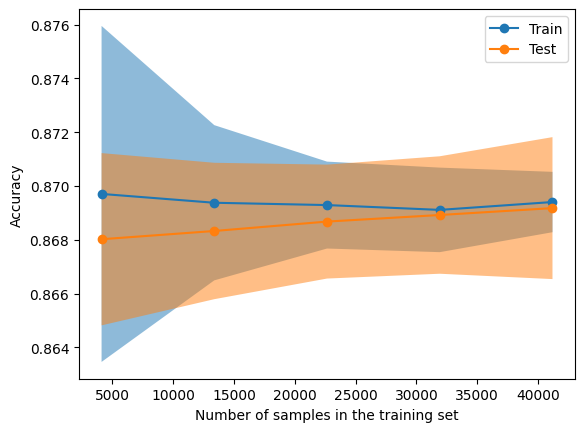

In [25]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

# learning score e training score

LearningCurveDisplay.from_estimator(
    win_predictor, 
    X = X, 
    y = y,
    train_sizes = np.linspace(0.1, 1.0, 5),
    cv = ShuffleSplit(n_splits=25, test_size=0.2, random_state=0),
    score_type = "both",
    n_jobs = 4,
    line_kw = {"marker": "o"},
    std_display_style = "fill_between",
    score_name = "Accuracy",
)

In [26]:
# Bernoulli Naive Bayes for predicting win based on first objectives

from sklearn.naive_bayes import BernoulliNB

model_columns = columns[1:]

for column in model_columns:
    model_data[column] = model_data[column] == 1

X, y = (model_data[model_columns], model_data["winner"] == 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
win_predictor = BernoulliNB()
y_pred = win_predictor.fit(X_train, y_train).predict(X_test)

print((y_test == y_pred).sum() / len(X_test))

0.8493688094775684


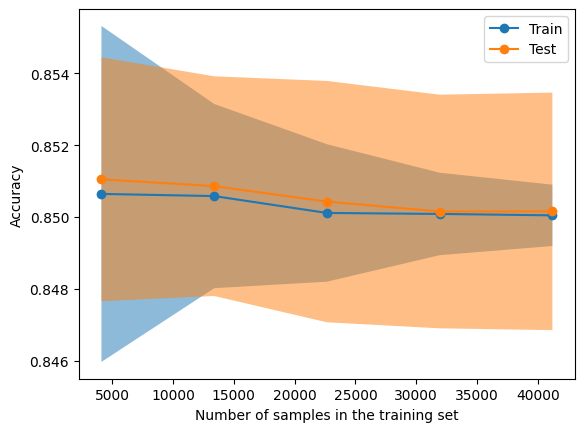

In [27]:
# learning score e training score

LearningCurveDisplay.from_estimator(
    win_predictor, 
    X = X, 
    y = y,
    train_sizes = np.linspace(0.1, 1.0, 5),
    cv = ShuffleSplit(n_splits=25, test_size=0.2, random_state=0),
    score_type = "both",
    n_jobs = 4,
    line_kw = {"marker": "o"},
    std_display_style = "fill_between",
    score_name = "Accuracy",
)

In [28]:
games_data.columns

Index(['creationTime', 'gameDuration', 'seasonId', 'winner', 'firstBlood',
       'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon',
       'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2',
       't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id',
       't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1',
       't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2',
       't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4',
       't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills',